## Importing libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
import opendatasets as od
import numpy as np
import openpyxl

In [2]:
!pip3 install opendatasets


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


#LAB 1 & 2

## Importing dataset

In [3]:
# df = pd.read_excel("./Bean/Drybean.xlsx")
# df_class1 = pd.read_excel("./Bean/Drybean_seker.xlsx")

od.download("https://www.kaggle.com/datasets/muratkokludataset/dry-bean-dataset")

100%|██████████| 4.54M/4.54M [00:10<00:00, 462kB/s]

In [4]:
#reading the imported dataset
df = pd.read_excel("./dry-bean-dataset/Dry_Bean_Dataset/Dry_Bean_Dataset.xlsx")

## Prints the summary statistics for each numerical column

In [5]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## The head function prints the first n-rows. (default = 5)

In [6]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## Prints basic info about the dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [8]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [9]:
# label_encoder = LabelEncoder()
# df['Class'] = label_encoder.fit_transform(df['Class'])

In [10]:
df["Class"].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [11]:
#dropping rows to obtain a dataset with only 3 classes
df = df.drop(df[df["Class"].isin(['CALI', 'HOROZ' , 'SIRA', 'DERMASON'])].index)

In [12]:
df.shape

(3871, 17)

In [13]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

In [14]:
df1["Class"]=(df1["Class"] == "SEKER").astype(int)

In [15]:
corr_matrix = df1.corr()
corr_matrix["Class"].sort_values(ascending=False)

Class              1.000000
ShapeFactor2       0.896954
ShapeFactor3       0.839155
Compactness        0.838707
roundness          0.826655
ShapeFactor1       0.736126
Solidity           0.628639
ShapeFactor4       0.559071
Extent             0.223890
MinorAxisLength   -0.648133
Area              -0.655950
ConvexArea        -0.658819
EquivDiameter     -0.727905
MajorAxisLength   -0.767539
Perimeter         -0.787626
Eccentricity      -0.817392
AspectRation      -0.828346
Name: Class, dtype: float64

In [16]:
df2["Class"]=(df2["Class"] == "BARBUNYA").astype(int)

In [17]:
corr_matrix2 = df2.corr()
corr_matrix2["Class"].sort_values(ascending=False)

Class              1.000000
Eccentricity       0.586839
AspectRation       0.580681
Perimeter          0.226561
MajorAxisLength    0.195281
EquivDiameter      0.127981
ConvexArea         0.031047
Area               0.026927
MinorAxisLength    0.024874
ShapeFactor1      -0.176947
ShapeFactor4      -0.184680
Extent            -0.338945
ShapeFactor2      -0.522711
Compactness       -0.588818
ShapeFactor3      -0.591334
Solidity          -0.639290
roundness         -0.795976
Name: Class, dtype: float64

In [18]:
df3["Class"]=(df3["Class"] == "BOMBAY").astype(int)

In [19]:
corr_matrix3 = df3.corr()
corr_matrix3["Class"].sort_values(ascending=False)

Class              1.000000
Area               0.921762
ConvexArea         0.920237
MinorAxisLength    0.913183
EquivDiameter      0.886676
MajorAxisLength    0.851191
Perimeter          0.837135
AspectRation       0.405024
Eccentricity       0.380457
Extent             0.143206
Solidity          -0.031636
roundness         -0.103641
ShapeFactor3      -0.406039
Compactness       -0.408876
ShapeFactor4      -0.561081
ShapeFactor2      -0.585829
ShapeFactor1      -0.830714
Name: Class, dtype: float64

#LAB 3

## Creation of sub datasets

### Top 2, 5 and 10

In [20]:
colums_to_add_top_2 = ['ShapeFactor2', 'ShapeFactor3', 'Solidity', 'roundness', 'Area', 'ConvexArea', 'Class']

colums_to_add_top_5 = [
    'ShapeFactor2', 'ShapeFactor3', 'Compactness', 'AspectRation', 'Solidity', 'roundness',
    'Eccentricity','Area', 'ConvexArea', 'MinorAxisLength','EquivDiameter', 'Class'
    ]

colums_to_add_top_10 = [
'ShapeFactor2', 'ShapeFactor3', 'Compactness', 'roundness', 'Eccentricity', 'AspectRation',
'MajorAxisLength' , 'Perimeter' , 'EquivDiameter', 'ShapeFactor1', 'Solidity', 'Extent' ,
'ShapeFactor4', 'Area', 'ConvexArea' , 'Class'
]

### Creating Sub Datasets

In [21]:
df_top2 = df.filter(colums_to_add_top_2, axis=1)
df_top5 = df.filter(colums_to_add_top_5, axis=1)
df_top10 = df.filter(colums_to_add_top_10, axis=1)

In [22]:
df_top2.to_excel('Top2.xlsx', index=False)
df_top5.to_excel('Top5.xlsx', index=False)
df_top10.to_excel('Top10.xlsx', index=False)

#LAB 4

### Preprocessing Data

#### Importing libraries and modules

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#### Transforming Class Feature

In [24]:
df["Class"].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY'], dtype=object)

In [25]:
#Function to transform Nominal values to Numeric values
def transform_dataset(df):
    df["Class"] = df['Class'].replace(['SEKER', 'BARBUNYA', 'BOMBAY'], [0,1,2])


In [26]:
transform_dataset(df_top2)
transform_dataset(df_top5)
transform_dataset(df_top10)
transform_dataset(df)

In [27]:
df_top2["Class"].unique()

array([0, 1, 2])

In [28]:
df_top5["Class"].unique()

array([0, 1, 2])

In [29]:
df_top10["Class"].unique()

array([0, 1, 2])

### Normalizing Data

In [30]:
# Creating a functing to Scale the dataset

def scale_dataset(dataframe):
  scaler = MinMaxScaler()
  dataframe[dataframe.columns[:-1]] = scaler.fit_transform(dataframe[dataframe.columns[:-1]])
  y = dataframe[dataframe.columns[-1]].values
  return dataframe

# scale_dataset(df)

### Splitting into Train and Test Datasets

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics  import f1_score,accuracy_score

In [32]:
# Normalizing data
normalized_df = scale_dataset(df)

In [33]:
# separating features and target columns of dataset
X = normalized_df.drop('Class', axis=1)
y = normalized_df['Class']

In [34]:
X

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.000000,0.000000,0.014217,0.009267,0.186195,0.517291,0.000000,0.000000,0.624114,0.922824,0.917733,0.729821,0.969567,0.833049,0.698093,0.980620
1,0.001499,0.020164,0.000000,0.039877,0.078324,0.301490,0.001948,0.002984,0.703850,0.871514,0.738897,0.877810,0.894436,0.967315,0.860551,0.974979
2,0.004354,0.010050,0.022851,0.016335,0.199724,0.537484,0.004157,0.008622,0.680561,0.932141,0.892095,0.713074,0.950916,0.800942,0.680152,0.987196
3,0.007130,0.025884,0.018637,0.039123,0.139136,0.437247,0.008565,0.014044,0.698731,0.761614,0.781476,0.784522,0.902542,0.854744,0.757321,0.893675
4,0.007714,0.007158,0.002458,0.065984,0.038823,0.179374,0.007257,0.015176,0.660612,0.949832,0.985369,0.938662,0.834465,1.000000,0.929398,0.989116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3866,0.923323,0.953686,0.998671,0.836405,0.824142,0.953628,0.903686,0.947956,0.704434,0.883221,0.538295,0.113294,0.070900,0.008316,0.097129,0.835293
3867,0.941234,0.934964,0.976805,0.886402,0.729082,0.921895,0.919240,0.960280,0.850450,0.907939,0.629589,0.180891,0.049392,0.021126,0.157049,0.808956
3868,0.972629,0.926686,0.955776,0.951019,0.624778,0.879671,0.948074,0.981632,0.797598,0.930219,0.718640,0.266410,0.021366,0.037189,0.234963,0.846003
3869,0.985925,0.952365,0.963342,0.967915,0.615781,0.875590,0.975118,0.990583,0.635464,0.761928,0.663773,0.267382,0.017483,0.036095,0.235862,0.759865


In [35]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3866    2
3867    2
3868    2
3869    2
3870    2
Name: Class, Length: 3871, dtype: int64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Classification Models

### Desicion Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

#### Training Model

In [38]:
# Training the model
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train,y_train)

DecisionTreeClassifier()

#### Evaluating the Model

In [39]:
# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [40]:
# Evaluating the Model

# We use the predict() on the model to predict the output
pred = dtc_model.predict(X_test)

#### Confusion Matrix

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [42]:
cf_matrix = confusion_matrix(y_test, pred)

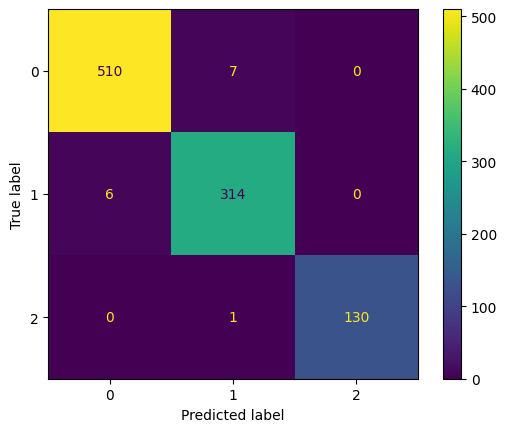

In [43]:
#Plotting confusion Matrix using SKLearn
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=dtc_model.classes_)
vis.plot()
plt.show()

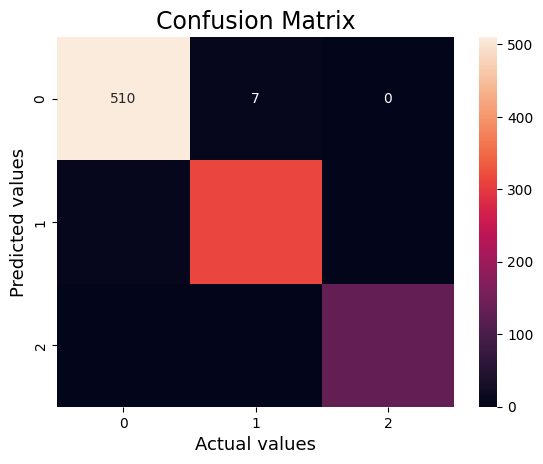

In [44]:
# Plotting a Confusion Matrix in Seaborn
conf_matrix = confusion_matrix(y_test, pred, labels=dtc_model.classes_)
sns.heatmap(conf_matrix,
            annot=True,
            fmt='g',
            xticklabels=dtc_model.classes_,
            yticklabels=dtc_model.classes_,
    )
plt.ylabel('Predicted values',fontsize=13)
plt.xlabel('Actual values',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### Evalutation Of The Model

In [45]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

#### Overall evaluation of the model

In [46]:
print("Accuracy Score : ",accuracy_score(y_test,pred))
print("Precision Score : ",precision_score(y_test, pred, average='micro'))
print("Recall Score : ",recall_score(y_test, pred, average='micro'))
print("Mean Absolute Error : ",mean_absolute_error(y_test,pred))

Accuracy Score :  0.9855371900826446
Precision Score :  0.9855371900826446
Recall Score :  0.9855371900826446
Mean Absolute Error :  0.014462809917355372


#### Classwise Evaluation of the model

In [47]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred)
# We store all the precisions, recalls, accuracies and FP rate of individual classes in a list
num_classes = len(set(y_test))
precisions = []
recalls = []
accuracies = []
fp_rates = []

# We calculate the precision, recall and accuracies here.
for i in range(num_classes):
    precision_i = precision_score(y_test, pred, labels=[i], average='micro')
    recall_i = recall_score(y_test, pred, labels=[i], average='micro')
    accuracy_i = accuracy_score(y_test, pred)
    precisions.append(precision_i)
    recalls.append(recall_i)
    accuracies.append(accuracy_i)

# We calculate the FP rate of individual classes from the confusion matrix here.
for i in range(num_classes):
    FP = conf_matrix.sum(axis=0)[i] - conf_matrix[i, i]
    TN = conf_matrix.sum() - conf_matrix.sum(axis=0)[i] - conf_matrix.sum(axis=1)[i] + conf_matrix[i, i]
    fp_rate_i = FP / (FP + TN)
    fp_rates.append(fp_rate_i)

# We display all the metrics result here
for i in range(num_classes):
    print(f"Class {i}:")
    print(f"Precision: {precisions[i]}")
    print(f"Recall: {recalls[i]}")
    print(f"FP rate: {fp_rates[i]}")
    print(f"Accuracy: {accuracies[i]}")
    print()


Class 0:
Precision: 0.9883720930232558
Recall: 0.9864603481624759
FP rate: 0.013303769401330377
Accuracy: 0.9855371900826446

Class 1:
Precision: 0.9751552795031055
Recall: 0.98125
FP rate: 0.012345679012345678
Accuracy: 0.9855371900826446

Class 2:
Precision: 1.0
Recall: 0.9923664122137404
FP rate: 0.0
Accuracy: 0.9855371900826446



## Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
# Training the model
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

/Users/prasithaprasanna/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
# Evaluating the Model
# We use the predict() on the model to predict the output
pred = lr_model.predict(X_test)

In [51]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test, pred)

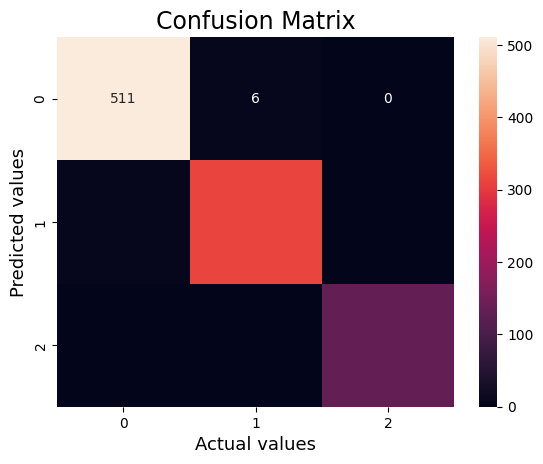

In [52]:
# Plotting a Confusion Matrix in Seaborn
conf_matrix = confusion_matrix(y_test, pred, labels=dtc_model.classes_)
sns.heatmap(conf_matrix,
            annot=True,
            fmt='g',
            xticklabels=dtc_model.classes_,
            yticklabels=dtc_model.classes_,
    )
plt.ylabel('Predicted values',fontsize=13)
plt.xlabel('Actual values',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### Evaluation Of The Model

#### Overall evaluation of the model

In [53]:
print("Accuracy Score : ",accuracy_score(y_test,pred))
print("Precision Score : ",precision_score(y_test, pred, average='micro'))
print("Recall Score : ",recall_score(y_test, pred, average='micro'))
print("Mean Absolute Error : ",mean_absolute_error(y_test,pred))

Accuracy Score :  0.9865702479338843
Precision Score :  0.9865702479338843
Recall Score :  0.9865702479338843
Mean Absolute Error :  0.013429752066115703


#### Classwise Evaluatuion of the model

In [54]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred)
# We store all the precisions, recalls, accuracies and FP rate of individual classes in a list
num_classes = len(set(y_test))
precisions = []
recalls = []
accuracies = []
fp_rates = []
# tp_rates = []

# We calculate the precision, recall and accuracies here.
for i in range(num_classes):
    precision_i = precision_score(y_test, pred, labels=[i], average='micro')
    recall_i = recall_score(y_test, pred, labels=[i], average='micro')
    accuracy_i = accuracy_score(y_test, pred)
    precisions.append(precision_i)
    recalls.append(recall_i)
    accuracies.append(accuracy_i)

# We calculate the FP rate of individual classes from the confusion matrix here.
for i in range(num_classes):
    FP = conf_matrix.sum(axis=0)[i] - conf_matrix[i, i]
    TN = conf_matrix.sum() - conf_matrix.sum(axis=0)[i] - conf_matrix.sum(axis=1)[i] + conf_matrix[i, i]
    fp_rate_i = FP / (FP + TN)
    fp_rates.append(fp_rate_i)
    # TP = TP = conf_matrix[i, i]  # Get true positives for the current class
    # total_positives = np.sum(conf_matrix[i, :])  # Total positives for the current class
    # tp_rate_i = TP / total_positives if total_positives > 0 else 0  # Calculate TP rate
    # tp_rates.append(tp_rate_i)

# We display all the metrics result here
for i in range(num_classes):
    print(f"Class {i}:")
    print(f"Precision: {precisions[i]}")
    print(f"Recall: {recalls[i]}")
    print(f"FP rate: {fp_rates[i]}")
    print(f"Accuracy: {accuracies[i]}")
    # print(f"TP rate: {tp_rates[i]}")
    print()

Class 0:
Precision: 0.9864864864864865
Recall: 0.988394584139265
FP rate: 0.015521064301552107
Accuracy: 0.9865702479338843

Class 1:
Precision: 0.9811912225705329
Recall: 0.978125
FP rate: 0.009259259259259259
Accuracy: 0.9865702479338843

Class 2:
Precision: 1.0
Recall: 1.0
FP rate: 0.0
Accuracy: 0.9865702479338843



## ROC

In [55]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [56]:
X, y = fp_rate_i, recall_i

In [57]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve([0, 1], [fp_rates[i], recalls[i]])  # FP rate and Recall (TP rate) for the current class
    roc_auc[i] = auc(fpr[i], tpr[i])


In [58]:
# num_classes = 0  # Replace with the class number you're interested in
# auc_value = roc_auc[num_classes]
# print(f"AUC for Class {num_classes}: {auc_value}")

In [59]:
# Class = 1  # Replace with the class number you're interested in
# auc_value = roc_auc[Class]
# print(f"AUC for Class {Class}: {auc_value}")

In [60]:
# Class = 2  # Replace with the class number you're interested in
# auc_value = roc_auc[Class]
# print(f"AUC for Class {Class}: {auc_value}")

## ROC Graph for all the 3 classes

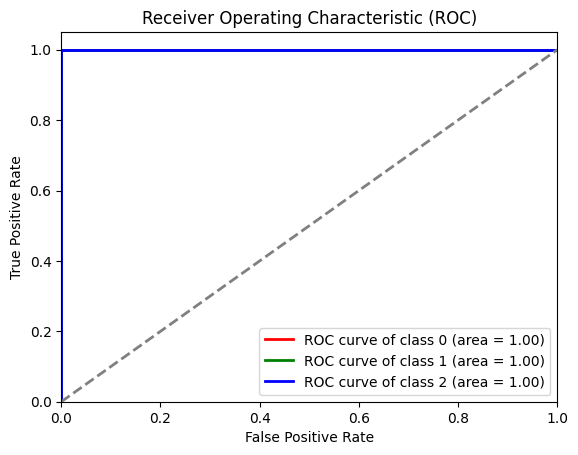

In [61]:
#plot the graph
plt.figure()
colors = ['red', 'green', 'blue']  # Define colors for different classes
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#Lab 5

In [62]:
#reading the imported dataset
df = pd.read_excel("./dry-bean-dataset/Dry_Bean_Dataset/Dry_Bean_Dataset.xlsx")

##Generating Metrix

In [63]:
#Importing libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix,f1_score,mean_absolute_error
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

In [64]:
df["Class"].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [65]:
#dropping rows to obtain a dataset with only 3 classes
df = df.drop(df[df["Class"].isin(['CALI', 'HOROZ' , 'SIRA', 'DERMASON'])].index)

In [66]:
#Function to transform Nominal values to Numeric values
def transform_dataset(df):
    df["Class"] = df['Class'].replace(['SEKER', 'BARBUNYA', 'BOMBAY'], [0,1,2])

transform_dataset(df)

In [67]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,0


In [68]:
# Creating a functing to Scale the dataset (this is to transform records so that they lie in 0 to 1 range)
def scale_dataset(dataframe):
  scaler = MinMaxScaler()
  dataframe[dataframe.columns[:-1]] = scaler.fit_transform(dataframe[dataframe.columns[:-1]])
  y = dataframe[dataframe.columns[-1]].values
  return dataframe

In [69]:
# Normalizing data
normalized_df = scale_dataset(df)

In [70]:
normalized_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0.000000,0.000000,0.014217,0.009267,0.186195,0.517291,0.000000,0.000000,0.624114,0.922824,0.917733,0.729821,0.969567,0.833049,0.698093,0.980620,0
1,0.001499,0.020164,0.000000,0.039877,0.078324,0.301490,0.001948,0.002984,0.703850,0.871514,0.738897,0.877810,0.894436,0.967315,0.860551,0.974979,0
2,0.004354,0.010050,0.022851,0.016335,0.199724,0.537484,0.004157,0.008622,0.680561,0.932141,0.892095,0.713074,0.950916,0.800942,0.680152,0.987196,0
3,0.007130,0.025884,0.018637,0.039123,0.139136,0.437247,0.008565,0.014044,0.698731,0.761614,0.781476,0.784522,0.902542,0.854744,0.757321,0.893675,0
4,0.007714,0.007158,0.002458,0.065984,0.038823,0.179374,0.007257,0.015176,0.660612,0.949832,0.985369,0.938662,0.834465,1.000000,0.929398,0.989116,0


In [71]:
# separating features and target columns of dataset
X = normalized_df.drop('Class', axis=1)
y = normalized_df['Class']

In [72]:
X

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.000000,0.000000,0.014217,0.009267,0.186195,0.517291,0.000000,0.000000,0.624114,0.922824,0.917733,0.729821,0.969567,0.833049,0.698093,0.980620
1,0.001499,0.020164,0.000000,0.039877,0.078324,0.301490,0.001948,0.002984,0.703850,0.871514,0.738897,0.877810,0.894436,0.967315,0.860551,0.974979
2,0.004354,0.010050,0.022851,0.016335,0.199724,0.537484,0.004157,0.008622,0.680561,0.932141,0.892095,0.713074,0.950916,0.800942,0.680152,0.987196
3,0.007130,0.025884,0.018637,0.039123,0.139136,0.437247,0.008565,0.014044,0.698731,0.761614,0.781476,0.784522,0.902542,0.854744,0.757321,0.893675
4,0.007714,0.007158,0.002458,0.065984,0.038823,0.179374,0.007257,0.015176,0.660612,0.949832,0.985369,0.938662,0.834465,1.000000,0.929398,0.989116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3866,0.923323,0.953686,0.998671,0.836405,0.824142,0.953628,0.903686,0.947956,0.704434,0.883221,0.538295,0.113294,0.070900,0.008316,0.097129,0.835293
3867,0.941234,0.934964,0.976805,0.886402,0.729082,0.921895,0.919240,0.960280,0.850450,0.907939,0.629589,0.180891,0.049392,0.021126,0.157049,0.808956
3868,0.972629,0.926686,0.955776,0.951019,0.624778,0.879671,0.948074,0.981632,0.797598,0.930219,0.718640,0.266410,0.021366,0.037189,0.234963,0.846003
3869,0.985925,0.952365,0.963342,0.967915,0.615781,0.875590,0.975118,0.990583,0.635464,0.761928,0.663773,0.267382,0.017483,0.036095,0.235862,0.759865


In [73]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3866    2
3867    2
3868    2
3869    2
3870    2
Name: Class, Length: 3871, dtype: int64

In [74]:
#Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [75]:
X_train.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
3263,0.254136,0.392191,0.407303,0.314213,0.623767,0.879216,0.248557,0.370604,0.706925,0.898854,0.561669,0.270849,0.449225,0.192470,0.239071,0.893765
177,0.025444,0.037698,0.048297,0.072757,0.165854,0.484725,0.024191,0.048475,0.680949,0.978811,0.970254,0.756050,0.820843,0.765563,0.726373,0.976945
3682,0.672581,0.756037,0.850908,0.625248,0.914838,0.979254,0.655351,0.762899,0.904508,0.934084,0.603942,0.052554,0.185201,0.021880,0.044542,0.849197
3577,0.620141,0.672437,0.711487,0.683182,0.603009,0.869660,0.601549,0.720657,0.648374,0.982964,0.770806,0.294373,0.145084,0.091824,0.260950,0.974476
1620,0.067615,0.107608,0.098906,0.166633,0.142588,0.443719,0.065710,0.120552,0.652048,0.939573,0.909891,0.788508,0.645228,0.680242,0.761675,0.991633


In [76]:
y_train.head()

3263    1
177     0
3682    2
3577    2
1620    0
Name: Class, dtype: int64

In [77]:
X_test.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
3211,0.239752,0.356893,0.343650,0.352938,0.417336,0.760783,0.235263,0.353926,0.610245,0.870982,0.662077,0.466729,0.401911,0.283129,0.426680,0.983806
3743,0.703706,0.759277,0.729347,0.812040,0.471683,0.797804,0.687434,0.787315,0.433930,0.905711,0.674083,0.403050,0.081767,0.107938,0.364336,0.852965
2288,0.145544,0.262352,0.257510,0.206751,0.479287,0.802593,0.143656,0.235417,0.651228,0.839233,0.563003,0.402878,0.586156,0.324985,0.364169,0.942571
2499,0.167049,0.308992,0.256088,0.270622,0.358552,0.714281,0.164872,0.264087,0.502738,0.834477,0.459545,0.527086,0.497128,0.368925,0.486977,0.975551
3206,0.238846,0.433310,0.425943,0.256231,0.786244,0.941641,0.237800,0.352864,0.332585,0.746861,0.298039,0.146467,0.518821,0.152807,0.126351,0.919695


In [78]:
y_test.head()

3211    1
3743    2
2288    1
2499    1
3206    1
Name: Class, dtype: int64

In [79]:
#Overall evaluation of model
# print("Accuracy Score : ",accuracy_score(y_test,pred))
# print("Precision Score : ",precision_score(y_test, pred, average='micro'))
# print("Recall Score : ",recall_score(y_test, pred, average='micro'))
# print("Mean Absolute Error : ",mean_absolute_error(y_test,pred))

In [80]:
# conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred)
# conf_matrix

In [81]:
# Calculating metrix
def print_metrics(model, y_test, y_pred):
  conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred)

  FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
  FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
  TP = np.diag(conf_matrix)
  TN = conf_matrix.sum() - (FP + FN + TP)

  # Sensitivity, hit rate, recall, or true positive rate
  TPR = TP/(TP+FN)

  # Specificity or true negative rate
  TNR = TN/(TN+FP)

  # Precision or positive predictive value
  PPV = TP/(TP+FP)

  # Negative predictive value
  NPV = TN/(TN+FN)

  # Fall out or false positive rate
  FPR = FP/(FP+TN)

  # False negative rate
  FNR = FN/(TP+FN)

  # False discovery rate
  FDR = FP/(TP+FP)

  # Overall accuracy
  ACC = (TP+TN)/(TP+FP+FN+TN)

  #Recall (sensitivity)
  recall = recall_score(y_test, pred, average='micro')

  print(f"Model - {model}:")
  print()

  print("Confusion Matrix:")
  print(conf_matrix)
  print()

  print(f"Accuracy (for each class): {ACC}")
  print(f"Accuracy (overall): {accuracy_score(y_test,pred)}")
  print()
  print(f"TP (True Positive): {TP}")
  print(f"TN (True Negative): {TN}")
  print(f"FP (False Negative): {FP}")
  print(f"FP (False Positive): {FN}")
  print()
  print(f"Sensitivity (true positive rate), for each class: {TPR}")
  print(f"Specificity (true negative rate), for each class: {TNR}")
  print()
  print(f"FP rate: {FPR}")
  print(f"FN rate: {FNR}")
  print(f"FP rate: {FDR}")
  print(f"NPV: {NPV}")
  print()
  print(f"Precision (for each class): {PPV}")
  print(f"Precision (overall): {precision_score(y_test, pred, average='micro')}")
  print(f"Recall (Sensitivity): {recall}")
  print(f"Mean Absolute Error: {mean_absolute_error(y_test,pred)}")



In [82]:
# Implement function for Area under ROC curve here

#     ** TO DO **

In [83]:
#Class-wise evaluation of model

# conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred)
# # We store all the precisions, recalls, accuracies and FP rate of individual classes in a list
# num_classes = len(set(y_test))
# precisions = []
# recalls = []
# accuracies = []
# fp_rates = []
# tp_rates = []

# # We calculate the precision, recall and accuracies here.
# for i in range(num_classes):
#     precision_i = precision_score(y_test, pred, labels=[i], average='micro')
#     recall_i = recall_score(y_test, pred, labels=[i], average='micro')
#     accuracy_i = accuracy_score(y_test, pred)
#     precisions.append(precision_i)
#     recalls.append(recall_i)
#     accuracies.append(accuracy_i)

# # We calculate the FP rate of individual classes from the confusion matrix here.
# for i in range(num_classes):
#     FP = conf_matrix.sum(axis=0)[i] - conf_matrix[i, i]
#     TN = conf_matrix.sum() - conf_matrix.sum(axis=0)[i] - conf_matrix.sum(axis=1)[i] + conf_matrix[i, i]
#     fp_rate_i = FP / (FP + TN)
#     fp_rates.append(fp_rate_i)

#     TP = conf_matrix[i, i]  # Get true positives for the current class
#     total_positives = np.sum(conf_matrix[i, :])  # Total positives for the current class
#     #tp_rate_i = TP / total_positives if total_positives > 0 else 0  # Calculate TP rate
#     tp_rate_i = TP / (TP + FN)
#     tp_rates.append(tp_rate_i)

# # We display all the metrics result here
# for i in range(num_classes):
#     print(f"Class {i}:")
#     print(f"Accuracy: {accuracies[i]}")
#     print(f"TP (True Positive): {TP}")
#     print(f"FP (False Negative): {FP}")
#     print(f"TN (True Negative): {TN}")
#     print(f"TP rate (Sensitivity): {tp_rates[i]}")
#     print(f"FP rate: {fp_rates[i]}")
#     print(f"Precision: {precisions[i]}")
#     print(f"Recall: {recalls[i]}")


#     # print(f"TP rate: {tp_rates[i]}")
#     print()

##Naive Bayes Models

In [84]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

###Gaussian Bayes

In [85]:
gnb = GaussianNB()
# Evaluating model
# We use the predict() on the model to predict the output
# Training the model
gnb.fit(X_train,y_train)
pred = gnb.predict(X_test)

print_metrics("Gaussian Naive Bayes", y_test, pred)

Model - Gaussian Naive Bayes:

Confusion Matrix:
[[503  14   0]
 [  6 314   0]
 [  0   0 131]]

Accuracy (for each class): [0.97933884 0.97933884 1.        ]
Accuracy (overall): 0.9793388429752066

TP (True Positive): [503 314 131]
TN (True Negative): [445 634 837]
FP (False Negative): [ 6 14  0]
FP (False Positive): [14  6  0]

Sensitivity (true positive rate), for each class: [0.9729207 0.98125   1.       ]
Specificity (true negative rate), for each class: [0.98669623 0.97839506 1.        ]

FP rate: [0.01330377 0.02160494 0.        ]
FN rate: [0.0270793 0.01875   0.       ]
FP rate: [0.01178782 0.04268293 0.        ]
NPV: [0.96949891 0.990625   1.        ]

Precision (for each class): [0.98821218 0.95731707 1.        ]
Precision (overall): 0.9793388429752066
Recall (Sensitivity): 0.9793388429752066
Mean Absolute Error: 0.02066115702479339


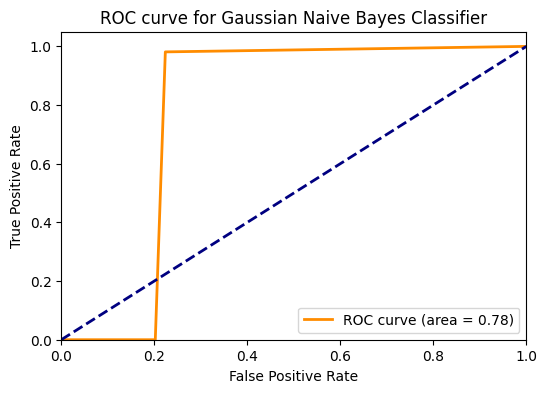

In [86]:
# Area under ROC Curve
#plot the graph
fpr, tpr, thresholds = roc_curve(y_test, pred, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Gaussian Naive Bayes Classifier')
plt.legend(loc='lower right')
plt.show()
#    **TO DO**

###Multinomial Naive Bayes

In [87]:
mnb = MultinomialNB()
# Evaluating model
# We use the predict() on the model to predict the output
# Training the model
mnb.fit(X_train,y_train)
pred = mnb.predict(X_test)

print_metrics("Multinominal Naive Bayes", y_test, pred)

Model - Multinominal Naive Bayes:

Confusion Matrix:
[[513   4   0]
 [ 15 305   0]
 [  0  13 118]]

Accuracy (for each class): [0.9803719  0.96694215 0.98657025]
Accuracy (overall): 0.9669421487603306

TP (True Positive): [513 305 118]
TN (True Negative): [436 631 837]
FP (False Negative): [15 17  0]
FP (False Positive): [ 4 15 13]

Sensitivity (true positive rate), for each class: [0.99226306 0.953125   0.90076336]
Specificity (true negative rate), for each class: [0.96674058 0.97376543 1.        ]

FP rate: [0.03325942 0.02623457 0.        ]
FN rate: [0.00773694 0.046875   0.09923664]
FP rate: [0.02840909 0.05279503 0.        ]
NPV: [0.99090909 0.97678019 0.98470588]

Precision (for each class): [0.97159091 0.94720497 1.        ]
Precision (overall): 0.9669421487603306
Recall (Sensitivity): 0.9669421487603306
Mean Absolute Error: 0.03305785123966942


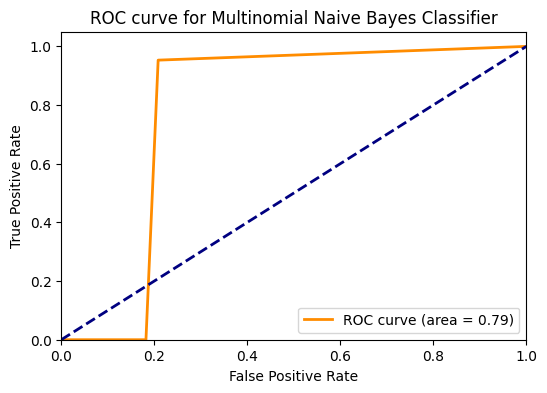

In [88]:

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred, pos_label=1)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Multinomial Naive Bayes Classifier')
plt.legend(loc='lower right')
plt.show()


###Complement Naive Bayes

In [89]:
complement_nb = ComplementNB()
# Evaluating model
# We use the predict() on the model to predict the output
# Training the model
complement_nb.fit(X_train,y_train)
pred = complement_nb.predict(X_test)

print_metrics("Complement Naive Bayes", y_test, pred)

Model - Complement Naive Bayes:

Confusion Matrix:
[[517   0   0]
 [ 73 108 139]
 [  0   0 131]]

Accuracy (for each class): [0.92458678 0.78099174 0.85640496]
Accuracy (overall): 0.78099173553719

TP (True Positive): [517 108 131]
TN (True Negative): [378 648 698]
FP (False Negative): [ 73   0 139]
FP (False Positive): [  0 212   0]

Sensitivity (true positive rate), for each class: [1.     0.3375 1.    ]
Specificity (true negative rate), for each class: [0.83813747 1.         0.8339307 ]

FP rate: [0.16186253 0.         0.1660693 ]
FN rate: [0.     0.6625 0.    ]
FP rate: [0.12372881 0.         0.51481481]
NPV: [1.         0.75348837 1.        ]

Precision (for each class): [0.87627119 1.         0.48518519]
Precision (overall): 0.78099173553719
Recall (Sensitivity): 0.78099173553719
Mean Absolute Error: 0.2190082644628099


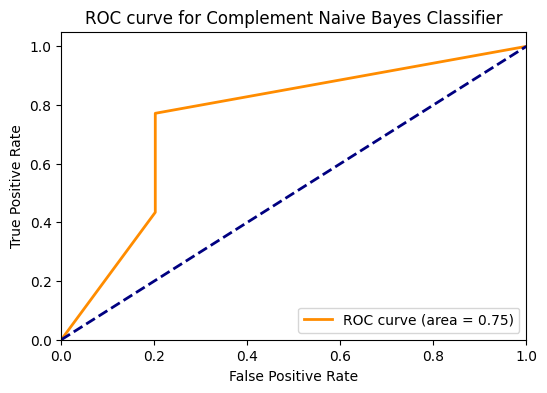

In [90]:
# Area under ROC Curve

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred, pos_label=1)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Complement Naive Bayes Classifier')
plt.legend(loc='lower right')
plt.show()

#    **TO DO**

###Bernoulli Naive Bayes

In [91]:
# import pyro
# import pyro.distributions as dist
# import torch
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt
# from sklearn.naive_bayes import BernoulliNB

# # Your existing data in PyTorch tensors
# X_train = torch.tensor([[0, 1, 1], [1, 0, 0], [1, 1, 1]])
# y_train = torch.tensor([1, 0, 1])
# X_test = torch.tensor([[0, 1, 0], [1, 1, 0]])

In [92]:
# # Your existing data in PyTorch tensors
# X_train = torch.tensor([[0, 1, 1], [1, 0, 0], [1, 1, 1]])
# y_train = torch.tensor([1, 0, 1])
# X_test = torch.tensor([[0, 1, 0], [1, 1, 0]])

bnb = BernoulliNB()
# Evaluating model
# We use the predict() on the model to predict the output
# Training the model
bnb.fit(X_train,y_train)
pred = bnb.predict(X_test)

print_metrics("Bernoulli Naive Bayes", y_test, pred)

Model - Bernoulli Naive Bayes:

Confusion Matrix:
[[516   0   1]
 [320   0   0]
 [131   0   0]]

Accuracy (for each class): [0.53305785 0.66942149 0.86363636]
Accuracy (overall): 0.5330578512396694

TP (True Positive): [516   0   0]
TN (True Negative): [  0 648 836]
FP (False Negative): [451   0   1]
FP (False Positive): [  1 320 131]

Sensitivity (true positive rate), for each class: [0.99806576 0.         0.        ]
Specificity (true negative rate), for each class: [0.         1.         0.99880526]

FP rate: [1.         0.         0.00119474]
FN rate: [0.00193424 1.         1.        ]
FP rate: [0.4663909       nan 1.       ]
NPV: [0.         0.66942149 0.86452947]

Precision (for each class): [0.5336091       nan 0.       ]
Precision (overall): 0.5330578512396694
Recall (Sensitivity): 0.5330578512396694
Mean Absolute Error: 0.6033057851239669


/var/folders/zn/j_0khzcs45q0wcmzrl4c60x40000gn/T/ipykernel_11034/1716950976.py:17: RuntimeWarning: invalid value encountered in divide
  PPV = TP/(TP+FP)
/var/folders/zn/j_0khzcs45q0wcmzrl4c60x40000gn/T/ipykernel_11034/1716950976.py:29: RuntimeWarning: invalid value encountered in divide
  FDR = FP/(TP+FP)


In [93]:
# def bayesian_model():
#     # Define model parameters
#     prob_a = pyro.sample("prob_a", dist.Beta(1, 1))
#     prob_b = pyro.sample("prob_b", dist.Beta(1, 1))

#     # Define observations
#     with pyro.plate("data", X_train.shape[0]):
#         pyro.sample("obs", dist.Bernoulli(torch.stack([prob_a, prob_b])[y_train]), obs=y_train)

# # Initialize Pyro
# pyro.set_rng_seed(101)  # Set a random seed for reproducibility

# # Use Pyro to perform Bayesian modeling
# pyro.clear_param_store()
# pyro.infer.Predictive(bayesian_model, guide=pyro.infer.autoguide.AutoDiagonalNormal(bayesian_model)).get_samples()

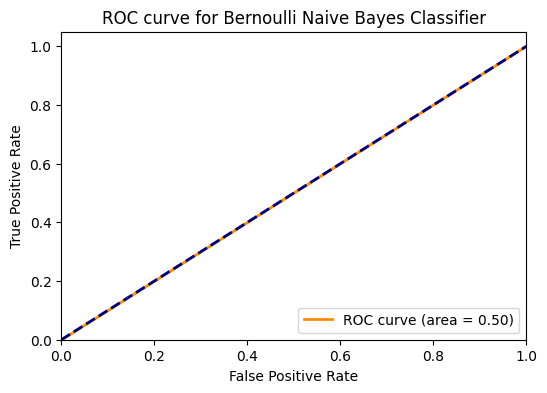

In [94]:
# Area under ROC Curve

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred, pos_label=1)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Bernoulli Naive Bayes Classifier')
plt.legend(loc='lower right')
plt.show()

###Categorical Naive Bayes

In [95]:
# categorical_nb = CategoricalNB()
# # Evaluating model
# # We use the predict() on the model to predict the output
# # Training the model
# categorical_nb.fit(X_train,y_train)
# pred = categorical_nb.predict(X_test)

# print_metrics("Categorical Naive Bayes", y_test, pred)